<a href="https://colab.research.google.com/github/shnyoo/AISC-case-competition/blob/main/mentorMatch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Preprocessing data

###Load data

In [ ]:
import pandas as pd
df = pd.read_csv("MentorMatch.csv")

In [ ]:
df

,Name,Age,City,Gender,Type of Admission,Major,Race,Academic Interest 1,Academic Interest 2,Academic Interest 3
0,Emma Johnson,19,New York City,Female,Instate,Computer Science,Caucasian,Artificial Intelligence,Web Development,Data Science
1,Noah Williams,20,Los Angeles,Male,Out of State,Film Studies,African American,Cinematography,Screenwriting,Film Production
2,Sophia Lee,21,Chicago,Female,Instate,Economics,Asian,Macroeconomics,Econometrics,Behavioral Economics
3,Liam Martinez,22,San Francisco,Male,Transfer,Data Science,Hispanic,Machine Learning,Natural Language Processing,Big Data Analytics
4,Ava Thompson,20,Seattle,Female,Out of State,Environmental Science,Caucasian,Conservation Biology,Climate Change Mitigation,Sustainable Agriculture
...,...,...,...,...,...,...,...,...,...,...
216,Emma Davis,19,San Francisco,Female,Instate,Environmental Studies,Caucasian,Sustainability,Ecological Restoration,Environmental Policy
217,Liam Smith,20,Chicago,Male,Out of State,Music Performance,Caucasian,Jazz Improvisation,Music Composition,Music Theory
218,Sophia Rodriguez,21,Miami,Female,Out of State,Hospitality Management,Hispanic,Event Planning,Hotel Operations,Food and Beverage Management
219,Oliver Wilson,22,Seattle,Male,Instate,Computer Engineering,Caucasian,Artificial Intelligence,Robotics,Embedded Systems


In [ ]:
excluded_col = ['Name', 'Age']

In [ ]:
# Extract the student attributes into a numpy array
data = df.drop(excluded_col, axis=1)
data

,City,Gender,Type of Admission,Major,Race,Academic Interest 1,Academic Interest 2,Academic Interest 3
0,New York City,Female,Instate,Computer Science,Caucasian,Artificial Intelligence,Web Development,Data Science
1,Los Angeles,Male,Out of State,Film Studies,African American,Cinematography,Screenwriting,Film Production
2,Chicago,Female,Instate,Economics,Asian,Macroeconomics,Econometrics,Behavioral Economics
3,San Francisco,Male,Transfer,Data Science,Hispanic,Machine Learning,Natural Language Processing,Big Data Analytics
4,Seattle,Female,Out of State,Environmental Science,Caucasian,Conservation Biology,Climate Change Mitigation,Sustainable Agriculture
...,...,...,...,...,...,...,...,...
216,San Francisco,Female,Instate,Environmental Studies,Caucasian,Sustainability,Ecological Restoration,Environmental Policy
217,Chicago,Male,Out of State,Music Performance,Caucasian,Jazz Improvisation,Music Composition,Music Theory
218,Miami,Female,Out of State,Hospitality Management,Hispanic,Event Planning,Hotel Operations,Food and Beverage Management
219,Seattle,Male,Instate,Computer Engineering,Caucasian,Artificial Intelligence,Robotics,Embedded Systems


###Process data into text inputs

In [ ]:
# Initialize list to store text data
text_data = []

# Loop through each row in the CSV file and create text data
for index, row in data.iterrows():
    text = ''
    for col, val in row.items():
        text += col + ':' + str(val) + ' '
    text_data.append(text.strip())

In [ ]:
import numpy as np

In [ ]:
arr = np.array(text_data)

In [ ]:
arr[0]

'City:New York City Gender:Female Type of Admission:Instate Major:Computer Science Race:Caucasian Academic Interest 1:Artificial Intelligence Academic Interest 2:Web Development Academic Interest 3:Data Science'

###Create embeddings

In [ ]:
!pip install openai

In [ ]:
import pandas as pd
import openai
key = #PRIVATE
openai.api_key = key

In [ ]:
# Assume `texts` is a numpy array of texts
num_samples = len(arr)
response = openai.Embedding.create(
    input=text[0],
    model="text-embedding-ada-002"
)
embedding_dim = len(response['data'][0]['embedding'])

In [ ]:
import time

In [ ]:
# Initialize an empty embedding matrix
embedding_matrix = np.zeros((num_samples, embedding_dim))

# Get the embedding for each text and add it to the embedding matrix
for i, text in enumerate(arr):
    # Wait for 1 second before making the next request
    time.sleep(1)

    response = openai.Embedding.create(
        input=text,
        model="text-embedding-ada-002"
    )

    print(f'done with embedding{i}')
    embedding = np.array(response['data'][0]['embedding'])
    np.save(f'embedding{i}.npy', embedding)

    embedding_matrix[i, :] = response['data'][0]['embedding']

In [ ]:
np.save('embeddings.npy', embedding_matrix)

In [ ]:
np.array(response['data'][0]['embedding'])

array([-0.00866122, -0.00883561, -0.01163225, ..., -0.03330145,
       -0.01178727, -0.02697185])

#Grouping data

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [ ]:
embedding_matrix.shape

(221, 1536)

In [ ]:
# assume that X is your text embedding matrix of shape (n_samples, n_features)
X = embedding_matrix

In [ ]:
nbrs = NearestNeighbors(n_neighbors=5, metric='cosine').fit(X)
distances, indices = nbrs.kneighbors(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(embedding_matrix)

In [ ]:
majors = data['Major'].values

# Get unique labels and assign a color to each
unique_labels = np.unique(majors)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

###Plot by major

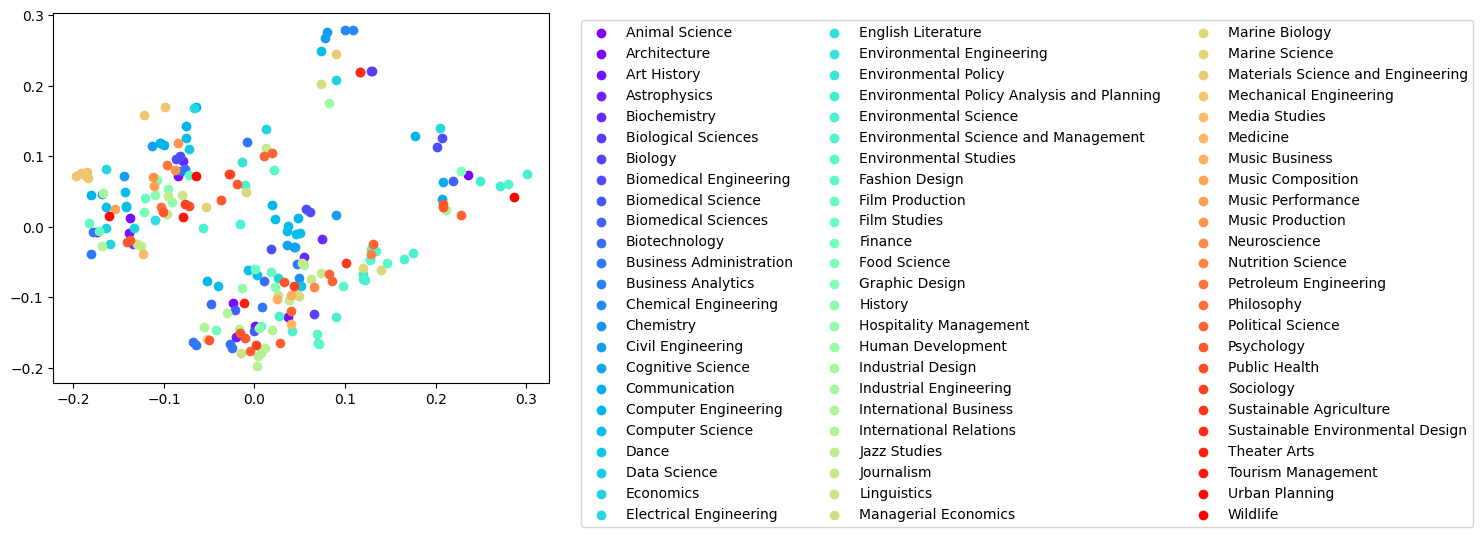

In [ ]:
# assume `labels` is a numpy array of shape (num_samples,)
# plot the PCA embeddings with color-coded labels
import matplotlib.pyplot as plt

# Plot each label as a separate color
for i, label in enumerate(unique_labels):
    plt.scatter(embedding_pca[majors == label, 0], 
                embedding_pca[majors == label, 1], 
                color=colors[i], label=label)

# Add legend outside and to the right of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)


# Show plot
plt.show()

In [ ]:
city = data['City'].values

# Get unique labels and assign a color to each
unique_labels = np.unique(city)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

###Plot by city

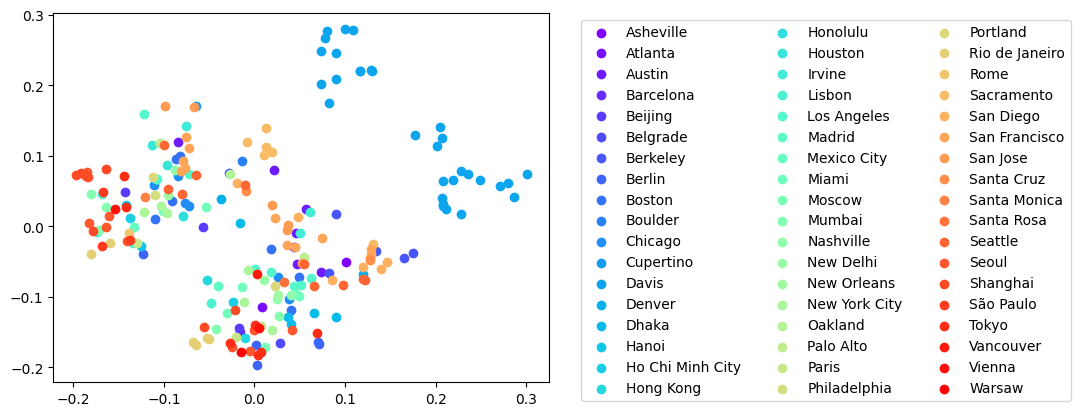

In [ ]:
# assume `labels` is a numpy array of shape (num_samples,)
# plot the PCA embeddings with color-coded labels
import matplotlib.pyplot as plt

# Plot each label as a separate color
for i, label in enumerate(unique_labels):
    plt.scatter(embedding_pca[city == label, 0], 
                embedding_pca[city == label, 1], 
                color=colors[i], label=label)

# Add legend outside and to the right of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)


# Show plot
plt.show()

In [ ]:
test_node = 1
NearestNeighbor = indices[test_node][1]

In [ ]:
data.iloc[test_node,:]

City                        Los Angeles
Gender                             Male
Type of Admission          Out of State
Major                      Film Studies
Race                   African American
Academic Interest 1      Cinematography
Academic Interest 2       Screenwriting
Academic Interest 3     Film Production
Name: 1, dtype: object

In [ ]:
data.iloc[NearestNeighbor,:]

City                       Los Angeles
Gender                          Female
Type of Admission              Instate
Major                  Film Production
Race                         Caucasian
Academic Interest 1     Cinematography
Academic Interest 2      Screenwriting
Academic Interest 3       Film Editing
Name: 214, dtype: object

In [ ]:
def get_recommendations(target_major, target_admission, preference):
    request = f'Major: {target_major} Type of Admission: {target_admission} Preference: {preference}'
    response = openai.Embedding.create(
        input=request,
        model="text-embedding-ada-002"
    )
    new_embedding = response['data'][0]['embedding']
    new_matrix = np.vstack([embedding_matrix, new_embedding])

    nearest_neighbors = NearestNeighbors(n_neighbors=5, metric='cosine').fit(new_matrix)
    distances, indices = nearest_neighbors.kneighbors(new_matrix)

    recommendations = indices[-1][1:]

    return recommendations

#Demo

In [ ]:
import ipywidgets as widgets
from IPython.display import display

import ipywidgets as widgets

option1 = ["Computer Science", "Economics", "Environmental Studies"]
option2 = ["Instate", "Out of State", "Transfer", "International"]

dropdown1 = widgets.Dropdown(options=option1, description="major:")
dropdown2 = widgets.Dropdown(options=option2, description="admission:")

display(dropdown1)
display(dropdown2)

preference = input("Do you have any other preferences? ")


Dropdown(description='major:', options=('Computer Science', 'Economics', 'Environmental Studies'), value='Comp…

Dropdown(description='admission:', options=('Instate', 'Out of State', 'Transfer', 'International'), value='In…

Do you have any other preferences? japan


In [ ]:
major = dropdown1.value
admission = dropdown2.value

In [ ]:
recommendations = get_recommendations(major, admission, preference)

In [ ]:
df.loc[recommendations]

,Name,Age,City,Gender,Type of Admission,Major,Race,Academic Interest 1,Academic Interest 2,Academic Interest 3
74,Ava Kimura,19,Tokyo,Female,International,Environmental Studies,Asian,Environmental Policy,Conservation Biology,Sustainable Development
16,Ethan Nguyen,21,Seattle,Male,Out of State,Environmental Science,Asian,Environmental Policy,Conservation Biology,Renewable Energy
122,Emma Nguyen,19,San Jose,Female,Instate,Environmental Science,Asian,Conservation Biology,Environmental Policy,Sustainability
28,Ethan Turner,22,Austin,Male,Out of State,Environmental Studies,Caucasian,Conservation Ecology,Sustainable Development,Environmental Policy
